In [22]:
import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [13]:
data = pd.read_csv('ex5data1.data', header=None, names=['f1','f2','f3','f4','label'])
data.head()

,f1,f2,f3,f4,label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [14]:
X = data.drop('label', axis = 1)
y = data['label']

## K-Means

In [19]:
from sklearn.cluster import KMeans
kmeans = [ KMeans(n_clusters = i, n_jobs = -1) for i in range(2,6) ]

In [27]:
kmeans = [ kmean.fit(X) for kmean in kmeans ]

In [28]:
inertias = [ kmean.inertia_ for kmean in kmeans ]

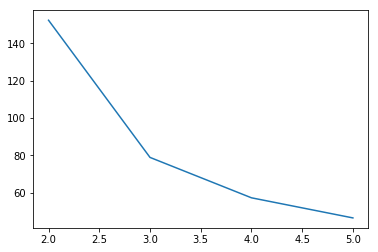

In [29]:
plt.plot( range(2,6), inertias, '-' )

### Seguindo o Método do Cotovelo, percebemos no gráfico acima que o número de clusters (valor de K) adequado seria K = 3. Como sabemos que o nosso problema possui 3 classes, podemos então constatar que o número de K = 3 de fato é o mais adequado.

In [51]:
kmeansk3 = kmeans[1]
labelByClass = [ len(kmeansk3.labels_[ kmeansk3.labels_ == i ])  for i in range(0, 3) ]
labelByClass

[62, 50, 38]

### Como podemos observar no resultado: [62, 50, 38], os clusters foram satisfatoriamente bem divididos. No entanto, percebemos que ele separou bem o grupo de classe 2, mas houve confusão quanto à divisão do grupo de classe 1 e 3, onde considerou pontos da classe 3 como sendo classe 1. Logo, percebe-se que a classe 2 é linearmente separável, porém as classes 1 e 3 não são.

## PCA

In [60]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [61]:
sum(pca.explained_variance_ratio_)

0.99481691454981014

### Com 3 componentes, conseguimos reduzir o conjunto de atributos preservando 99% da variância. Tal definição de valor foi alcançado com base em testes reduzindo o número de componentes. Se o número de componentes fosse igual ao conjunto de atributos, a variância seria 100%. No entanto, menos que 3 componentes não preservam mais os 99% de variância.

In [71]:
pca2n = PCA(n_components=2)
new_X = pca2n.fit_transform(X)

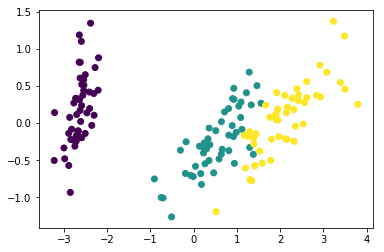

In [76]:
plt.scatter(new_X[:,0], new_X[:, 1], c=y)

### Sim, o comportamento linearmente separável continua para a classe 2 (em roxo), e para a classe 1 e 3 ainda não são linearmente separáveis, pois o PCA preserva a relação.